In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

# Contents
- Data Review
- Data Visualization
- Classifications Models 
- Data Preparing
- Decision Tree Classifier
- Random Forest Classifier

# Data Review

In [2]:
# Read the dataset with the pandas library.
data = pd.read_csv("drug200.csv")

In [3]:
data

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY
...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX


#### The target feature is
* Drug type

#### The feature sets are:
* Age
* Sex
* Blood Pressure Levels (BP)
* Cholesterol Levels
* Na to Potassium Ration

In [4]:
data = data.dropna() 
# removes any rows from the data that contain missing values (NaN values)

In [5]:
# Check for missing values

data.isnull().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

In [6]:
# Check for duplicates

duplicate = data[data.duplicated()]
duplicate

,Age,Sex,BP,Cholesterol,Na_to_K,Drug


No duplicate records are present.

In [7]:
# information of data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [8]:
# Dataset Values(Max, min, std..)
data.describe()

,Age,Na_to_K
count,200.000000,200.000000
mean,44.315000,16.084485
std,16.544315,7.223956
min,15.000000,6.269000
25%,31.000000,10.445500
50%,45.000000,13.936500
75%,58.000000,19.380000
max,74.000000,38.247000


In [9]:
# Data Correlation: Relationship between columns
data.corr()

,Age,Na_to_K
Age,1.000000,-0.063119
Na_to_K,-0.063119,1.000000


In [10]:
# Dataset columns names
data.columns

Index(['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K', 'Drug'], dtype='object')

In [11]:
# Data in the age column
data["Age"].value_counts(dropna=False)

47    8
23    7
28    7
49    7
39    6
32    6
50    5
37    5
58    5
60    5
22    5
34    4
72    4
51    4
42    4
26    4
24    4
74    4
67    4
68    4
61    4
56    4
20    4
36    4
45    4
41    4
31    4
43    4
65    4
57    4
53    3
40    3
70    3
59    3
16    3
38    3
15    3
69    3
35    3
18    3
64    3
52    2
55    2
62    2
19    2
29    2
66    2
73    2
46    2
48    2
54    1
17    1
33    1
63    1
30    1
21    1
25    1
Name: Age, dtype: int64

In [12]:
# Data in the Sex column
data["Sex"].value_counts()

M    104
F     96
Name: Sex, dtype: int64

In [13]:
# Data in the BP(Blood Pressure Levels) column
data["BP"].value_counts()

HIGH      77
LOW       64
NORMAL    59
Name: BP, dtype: int64

In [14]:
# Data in the Cholesterol column
data["Cholesterol"].value_counts()

HIGH      103
NORMAL     97
Name: Cholesterol, dtype: int64

In [15]:
# Data in the Drug column
data["Drug"].value_counts()

DrugY    91
drugX    54
drugA    23
drugC    16
drugB    16
Name: Drug, dtype: int64

# Data vizualization 

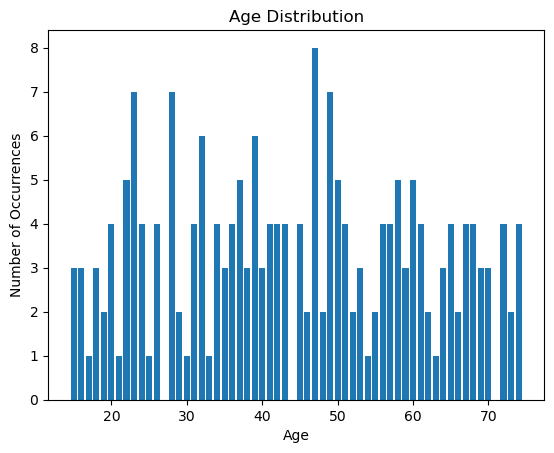

In [46]:
# Get the value counts of Age column
dataAge = data["Age"].value_counts(dropna=False)

# Create a bar plot
plt.bar(dataAge.index, dataAge.values)

# Set the plot title and axis labels
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Number of Occurrences')

# Show the plot
plt.show()

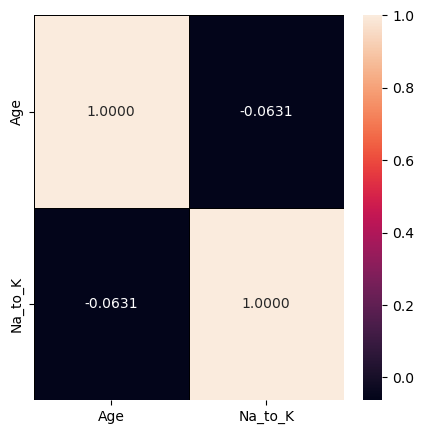

In [17]:
# Visualization of correlation result with seaborn library heatmap.
f, ax = plt.subplots(figsize = (5,5))
sns.heatmap(data.corr(), annot = True, linewidths=0.5, linecolor = "black", fmt = ".4f", ax = ax)
plt.show()

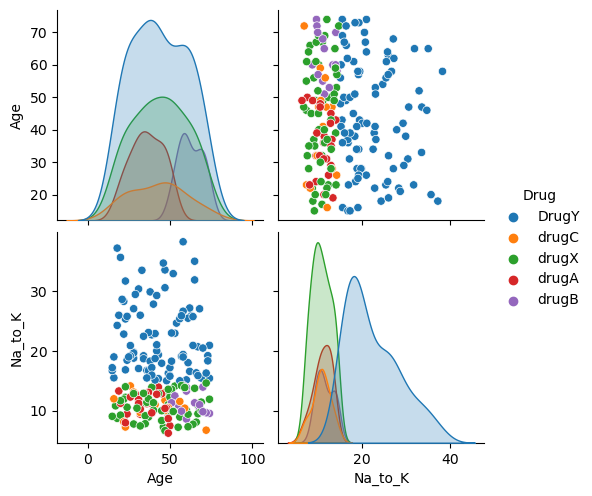

In [18]:
# Visualization of correlation results with seaborn library pairplot
sns.pairplot(data, hue = "Drug")

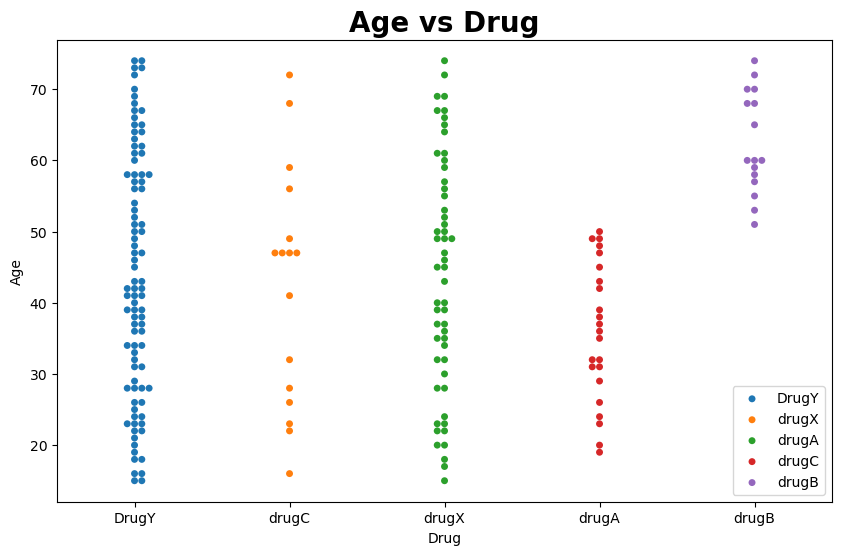

In [19]:
# Analyze Drug based on Age

plt.figure(figsize = (10,6))
sns.swarmplot(x = "Drug", y = "Age", data = data, hue='Drug')
plt.legend(data.Drug.value_counts().index)
plt.title("Age vs Drug", fontsize=20, fontweight='bold')
plt.show()

**Observation**:-

* drugA is only given to patients whose age is between 20 to 50 years.
* drugB is only given to patients above 50 years.
* DrugY, drugC and drugX can be given to all age groups.

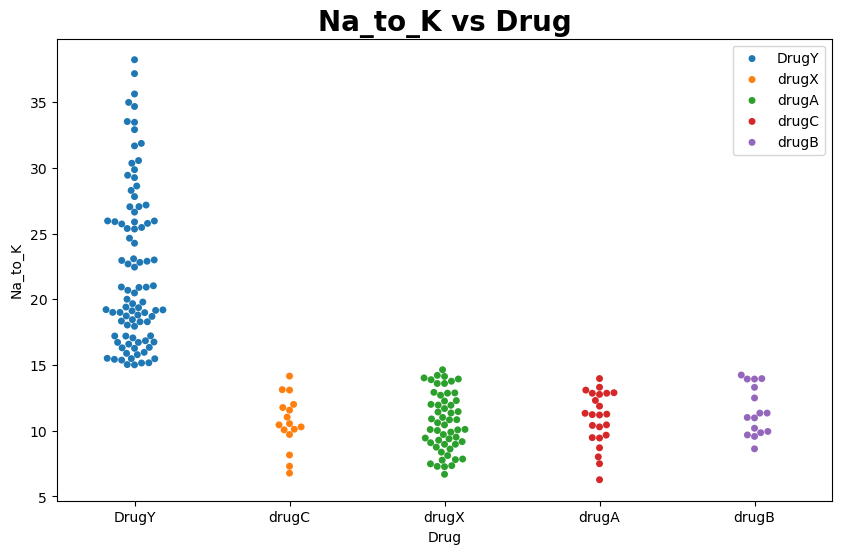

In [20]:
# Analyze Drug based on Na_to_K

plt.figure(figsize = (10,6))
sns.swarmplot(x = "Drug", y = "Na_to_K", data = data, hue='Drug')
plt.legend(data.Drug.value_counts().index)
plt.title("Na_to_K vs Drug", fontsize=20, fontweight='bold')
plt.show()

**Observation**:-

* DrugY is only given to patients whose Na_to_K ratio is greater than 15.
* drugC, drugX, drugA and drugB are given to patients whose Na_to_K ratio is between 5 and 15.

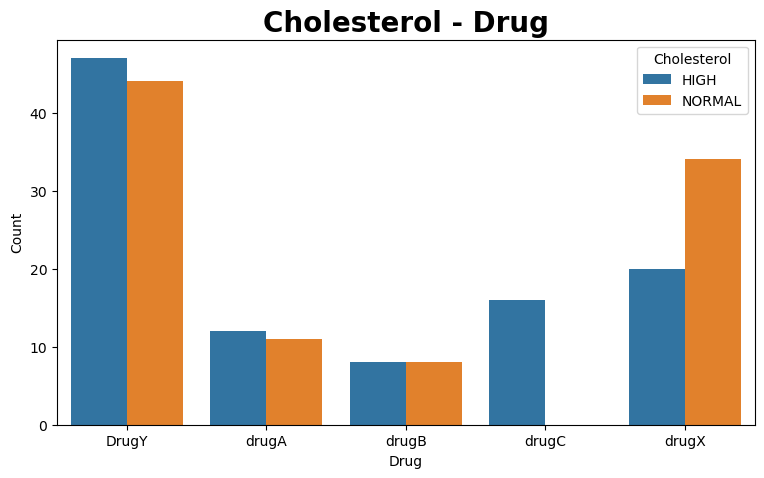

In [21]:
# Analyze Drug based on Cholesterol

df_Sex_Drug = data.groupby(["Drug", "Cholesterol"]).size().reset_index(name = "Count")

plt.figure(figsize = (9,5))
sns.barplot(x = "Drug", y = "Count", hue = "Cholesterol", data = df_Sex_Drug)
plt.title("Cholesterol - Drug", fontsize=20, fontweight='bold')
plt.show()

**Observation**:-

* DrugY and drugA is given to more patients whose Cholesterol level is High.
* drugB can be given to patients whose Cholesterol level is High or Normal.
* drugC is only given to those patients who have High Cholesterol level.
* drugX is given to more patients whose Cholesterol level is Normal.

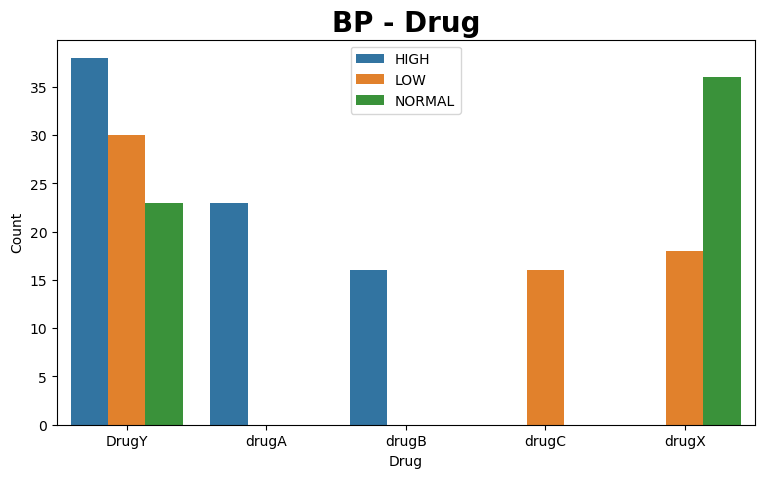

In [24]:
# Analyze Drug based on BP

df_Sex_Drug = data.groupby(["Drug", "BP"]).size().reset_index(name = "Count")

plt.figure(figsize = (9,5))
sns.barplot(x = "Drug", y = "Count", hue = "BP", data = df_Sex_Drug)
plt.title("BP - Drug", fontsize=20, fontweight='bold')
plt.legend(loc='upper center')
plt.show()

**Observation**:-

* DrugY is given to more patients whose BP is High.
* drugA and drugB can be given to only those patients whose BP is High.
* drugC is only given to those patients who have Low BP.
* drugX is given to more patients whose BP is Normal.

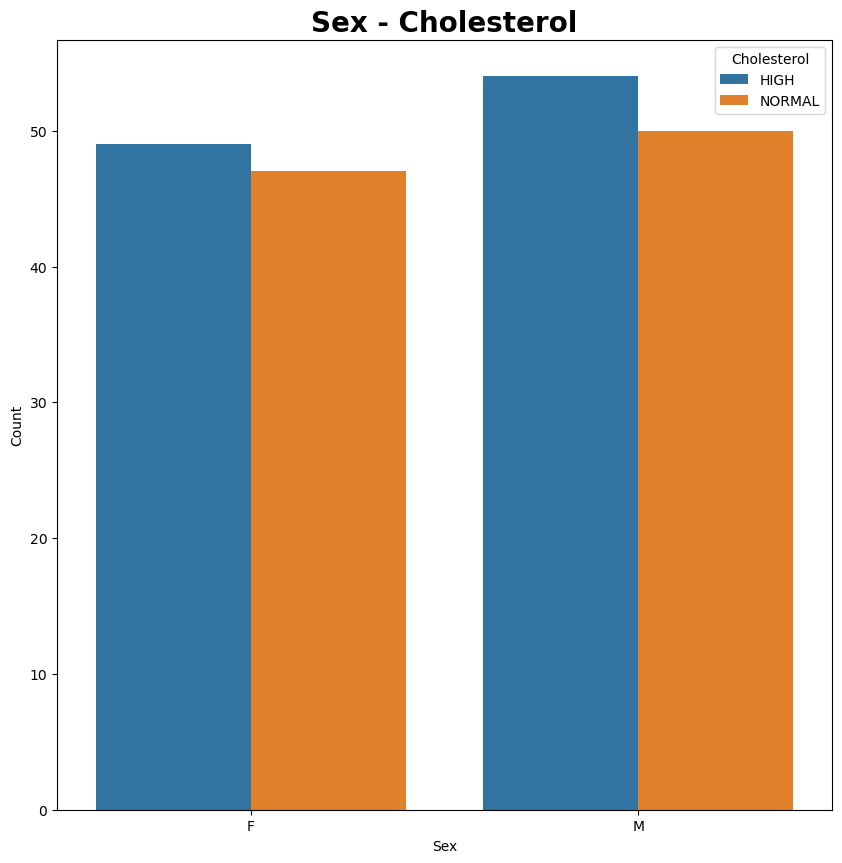

In [22]:
# Analyze Cholesterol based on Sex

df_Sex_Cholesterol = data.groupby(["Sex", "Cholesterol"]).size().reset_index(name = "Count")

plt.figure(figsize = (10,10))
sns.barplot(x = "Sex", y = "Count", hue = "Cholesterol", data = df_Sex_Cholesterol)
plt.title("Sex - Cholesterol", fontsize=20, fontweight='bold')
plt.show()


**Observation**:- It is observed that both Female and Male suffer from high cholesterol levels.

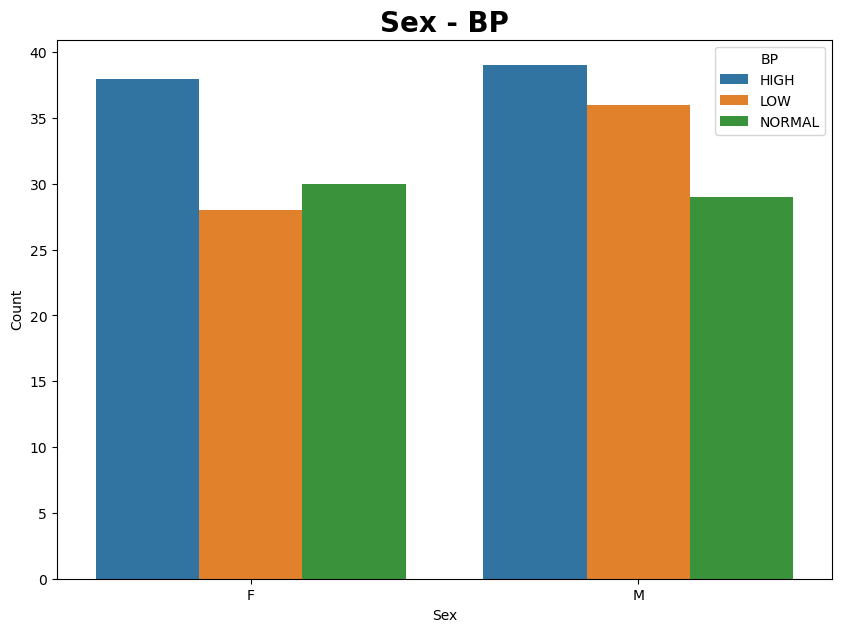

In [23]:
# Analyze BP based on Sex

df_Sex_BP = data.groupby(["Sex", "BP"]).size().reset_index(name = "Count")

plt.figure(figsize = (10,7))
sns.barplot(x = "Sex", y = "Count", hue = "BP", data = df_Sex_BP)
plt.title("Sex - BP", fontsize=20, fontweight='bold')
plt.show()

**Observation**:-

Both Female and Male suffer from high blood pressure levels.
More males suffer from high blood pressure than females.
Almost same number of male and female have normal blood pressure.

# Classifications Models
In this chapter, Firstly I will prepare the dataset for training and I will do training with models. I spoke about data inside columns of data during the Data review. Now I will convert string data to the integer type. I will split the dataset as train and test.

## Data Preparing

In [25]:
data

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY
...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX


In [26]:
# I don't want to object type.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [27]:
# Change Age type.
# F = 1
# M = 0
data.Sex = [1 if i == "F" else 0 for i in data.Sex]

In [28]:
data

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,1,HIGH,HIGH,25.355,DrugY
1,47,0,LOW,HIGH,13.093,drugC
2,47,0,LOW,HIGH,10.114,drugC
3,28,1,NORMAL,HIGH,7.798,drugX
4,61,1,LOW,HIGH,18.043,DrugY
...,...,...,...,...,...,...
195,56,1,LOW,HIGH,11.567,drugC
196,16,0,LOW,HIGH,12.006,drugC
197,52,0,NORMAL,HIGH,9.894,drugX
198,23,0,NORMAL,NORMAL,14.020,drugX


In [29]:
# Change BP(Blood Pressure Levels) type.
# LOW = 2
# NORMAL = 1
# HIGH = 0

import warnings
warnings.filterwarnings('ignore')

for i in range(0,len(data.BP)):
    if data.BP[i] == "LOW":
        data.BP[i] = 2
        
    elif data.BP[i] == "NORMAL":
        data.BP[i] = 1
        
    else:
        data.BP[i] = 0
    

In [30]:
data

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,1,0,HIGH,25.355,DrugY
1,47,0,2,HIGH,13.093,drugC
2,47,0,2,HIGH,10.114,drugC
3,28,1,1,HIGH,7.798,drugX
4,61,1,2,HIGH,18.043,DrugY
...,...,...,...,...,...,...
195,56,1,2,HIGH,11.567,drugC
196,16,0,2,HIGH,12.006,drugC
197,52,0,1,HIGH,9.894,drugX
198,23,0,1,NORMAL,14.020,drugX


In [31]:
# Change Cholesterol type.
# HIGH = 1
# NORMAL = 0
data.Cholesterol = [1 if i == "HIGH" else 0 for i in data.Cholesterol]

In [32]:
data

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,1,0,1,25.355,DrugY
1,47,0,2,1,13.093,drugC
2,47,0,2,1,10.114,drugC
3,28,1,1,1,7.798,drugX
4,61,1,2,1,18.043,DrugY
...,...,...,...,...,...,...
195,56,1,2,1,11.567,drugC
196,16,0,2,1,12.006,drugC
197,52,0,1,1,9.894,drugX
198,23,0,1,0,14.020,drugX


In [33]:
# Change Drug type.
# DrugY = 4
# DrugX = 3
# DrugA = 2
# DrugC = 1
# DrugB = 0

import warnings
warnings.filterwarnings('ignore')

for i in range(0,len(data)):
    if data.Drug[i] == "DrugY":
        data.Drug[i] = 4
    elif data.Drug[i] == "drugX":
        data.Drug[i] = 3
    elif data.Drug[i] == "drugA":
        data.Drug[i] = 2
    elif data.Drug[i] == "drugC":
        data.Drug[i] = 1
    else:
        data.Drug[i] = 0

In [34]:
# It is the final form of the dataset.
data

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,1,0,1,25.355,4
1,47,0,2,1,13.093,1
2,47,0,2,1,10.114,1
3,28,1,1,1,7.798,3
4,61,1,2,1,18.043,4
...,...,...,...,...,...,...
195,56,1,2,1,11.567,1
196,16,0,2,1,12.006,1
197,52,0,1,1,9.894,3
198,23,0,1,0,14.020,3


In [35]:
# I check again because possible unchanged types.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    int64  
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    int64  
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(3), object(2)
memory usage: 9.5+ KB


In [36]:
# I saw don't change two columns of type and I change them to integer types.
data_types_dict = {'BP': int, "Drug": int}

data = data.astype(data_types_dict)

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    int64  
 2   BP           200 non-null    int64  
 3   Cholesterol  200 non-null    int64  
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    int64  
dtypes: float64(1), int64(5)
memory usage: 9.5 KB


In [37]:
# x_data
x_data = data.drop(["Drug"], axis = 1)

#y_data
y_data = data.Drug.values

In [38]:
x_data

,Age,Sex,BP,Cholesterol,Na_to_K
0,23,1,0,1,25.355
1,47,0,2,1,13.093
2,47,0,2,1,10.114
3,28,1,1,1,7.798
4,61,1,2,1,18.043
...,...,...,...,...,...
195,56,1,2,1,11.567
196,16,0,2,1,12.006
197,52,0,1,1,9.894
198,23,0,1,0,14.020


In [39]:
y_data

array([4, 1, 1, 3, 4, 3, 4, 1, 4, 4, 1, 4, 4, 4, 3, 4, 3, 2, 1, 4, 4, 4,
       4, 4, 4, 4, 4, 3, 4, 4, 3, 0, 3, 4, 3, 3, 2, 3, 3, 3, 4, 0, 4, 3,
       3, 3, 2, 1, 4, 4, 4, 3, 4, 4, 0, 1, 0, 4, 3, 4, 4, 2, 4, 3, 0, 4,
       2, 3, 4, 4, 0, 4, 3, 4, 4, 4, 2, 4, 2, 3, 0, 3, 1, 2, 1, 0, 3, 4,
       4, 4, 4, 4, 4, 4, 4, 3, 4, 4, 4, 4, 2, 2, 1, 3, 4, 3, 3, 4, 0, 4,
       2, 3, 3, 3, 3, 4, 3, 3, 2, 4, 4, 4, 4, 4, 0, 4, 4, 3, 4, 3, 4, 4,
       3, 4, 4, 3, 0, 2, 0, 3, 2, 4, 0, 4, 2, 3, 3, 2, 3, 1, 2, 0, 3, 3,
       4, 1, 2, 4, 1, 3, 3, 0, 3, 4, 4, 4, 4, 3, 4, 2, 3, 3, 4, 4, 2, 4,
       2, 4, 4, 4, 4, 3, 3, 4, 4, 4, 0, 2, 4, 4, 4, 2, 4, 1, 4, 1, 1, 3,
       3, 3])

In [40]:
# Train test split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.3, random_state=1)

## Decision Tree Classifier 

Decision Tree is a Supervised learning technique that can be used for both classification and Regression problems, but mostly it is preferred for solving Classification problems. It is a tree-structured classifier, where internal nodes represent the features of a dataset, branches represent the decision rules and each leaf node represents the outcome.


In [41]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

dtc = DecisionTreeClassifier()

# Fit the model
dtc.fit(x_train, y_train)

# Predict the x_test
predict = dtc.predict(x_test)

print('The accuracy of the Decision Tree is',metrics.accuracy_score(predict,y_test))

The accuracy of the Decision Tree is 0.9666666666666667


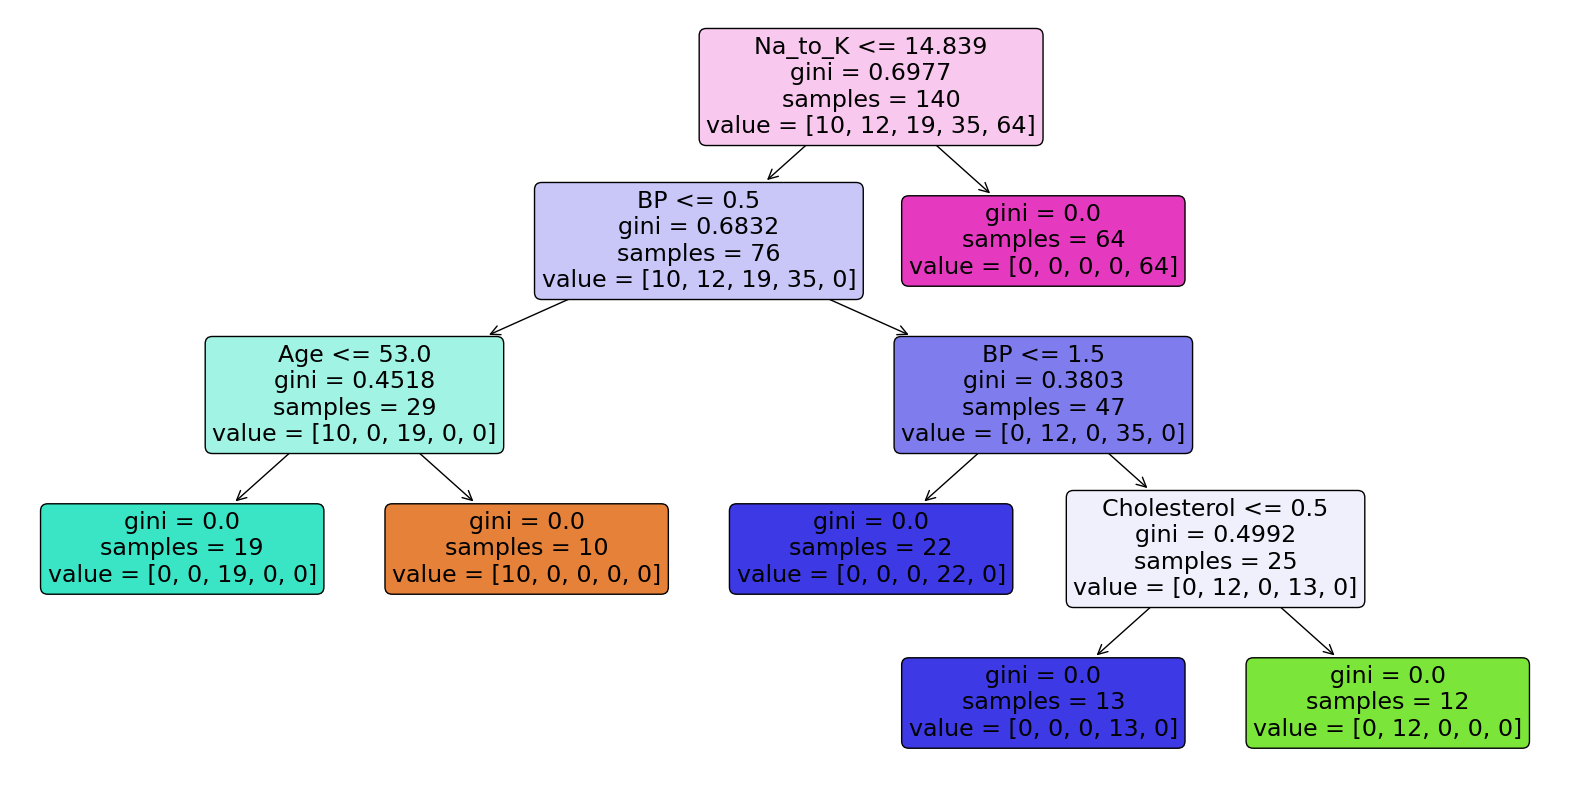

In [42]:
# Visualising the graph
from sklearn.tree import plot_tree

plt.figure(figsize = (20,10))
dec_tree = plot_tree(decision_tree=dtc, feature_names = data.columns, filled = True , precision = 4, rounded = True)

## Random Forest Classifier 

Random Forest is a popular machine learning algorithm that belongs to the supervised learning technique. It can be used for both Classification and Regression problems in ML. It is based on the concept of ensemble learning, which is a process of combining multiple classifiers to solve a complex problem and to improve the performance of the model.

In [43]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(random_state = 0)

# Fit the model
rfc.fit(x_train, y_train)

# Predict the model
predict = rfc.predict(x_test)

print('The accuracy of the Random Forest is',metrics.accuracy_score(predict,y_test))

The accuracy of the Random Forest is 0.95
